In [22]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv('edgelist1.csv')

In [24]:
df

,Source,Destination,Weight
0,A,B,3.5
1,A,C,1.0
2,A,D,2.0
3,B,E,3.0
4,C,D,4.0
5,C,F,5.0
6,D,E,6.0
7,E,G,4.0
8,E,H,4.0
9,F,G,2.0


In [25]:
len(df)

16

In [26]:
def undirected_graph(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d["weight"] for u,v,d in G.edges(data=True)})
    nx.draw_networkx_labels(G, pos)
    plt.axis('off')
    plt.show()
    nodes=list(G.nodes())
    print('Nodes of the above graph are:-\n',nodes)
    print('Total no of Nodes are:-',len(nodes))
    edges=list(G.edges())
    print('Edges of the above graph are:-\n',edges)
    print('Total no of Edges are:-\n',len(edges))
    print('Degree of nodes:-\n',G.degree( weight='weight'))
    degree=dict(G.degree( weight='weight'))
    degree_max=max(list(degree.values()))
    value = {i for i in degree if degree[i]==degree_max}
    print("max degree node:",value)
    degree_min=min(list(degree.values()))
    value = {i for i in degree if degree[i]==degree_min}
    print("min degree node:",value)

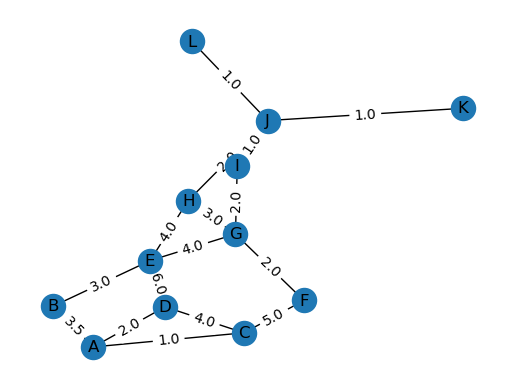

Nodes of the above graph are:-
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
Total no of Nodes are:- 12
Edges of the above graph are:-
 [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('C', 'D'), ('C', 'F'), ('D', 'E'), ('E', 'G'), ('E', 'H'), ('F', 'G'), ('G', 'H'), ('G', 'I'), ('H', 'J'), ('I', 'J'), ('J', 'K'), ('J', 'L')]
Total no of Edges are:-
 16
Degree of nodes:-
 [('A', 6.5), ('B', 6.5), ('C', 10.0), ('D', 12.0), ('E', 17.0), ('F', 7.0), ('G', 11.0), ('H', 9.0), ('I', 3.0), ('J', 5.0), ('K', 1.0), ('L', 1.0)]
max degree node: {'E'}
min degree node: {'L', 'K'}


In [27]:
undirected_graph(df)

In [28]:
def directed_graph(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    H = nx.DiGraph()
    H.add_weighted_edges_from(edges)
    pos = nx.spring_layout(H)  # Position the nodes using a spring layout algorithm
    nx.draw(H, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=2, alpha=0.9)
    nx.draw_networkx_edge_labels(H, pos, edge_labels={(u, v): d['weight'] for u, v, d in H.edges(data=True)}, font_size=8, font_color='black')  # Draw edge labels
    plt.show()
    nodes=list(H.nodes())
    print('Nodes of the above graph are:-\n',nodes)
    print('Total no of Nodes are:-',len(nodes))
    edges=list(H.edges())
    print('Edges of the above graph are:-\n',edges)
    print('Total no of Edges are:-\n',len(edges))
    print('out Degree',H.out_degree( weight='weight'))
    print('in Degree',H.in_degree( weight='weight'))
    degree=dict(H.degree( weight='weight'))
    max_out_degree=dict(H.out_degree(weight='weight'))
    degree_max=max(list(max_out_degree.values()))
    value = {i for i in max_out_degree if max_out_degree[i]==degree_max}
    print("max out degree node:",value)
    min_out_degree=dict(H.out_degree(weight='weight'))
    degree_min=min(list(min_out_degree.values()))
    value = {i for i in min_out_degree if min_out_degree[i]==degree_min}
    print("min out degree node:",value)
    max_in_degree=dict(H.in_degree(weight='weight'))
    degree_max=max(list(max_in_degree.values()))
    value = {i for i in max_in_degree if max_in_degree[i]==degree_max}
    print("max in degree node:",value)
    min_in_degree=dict(H.in_degree(weight='weight'))
    degree_min=min(list(min_in_degree.values()))
    value = {i for i in min_in_degree if min_in_degree[i]==degree_min}
    print("min in degree node:",value)

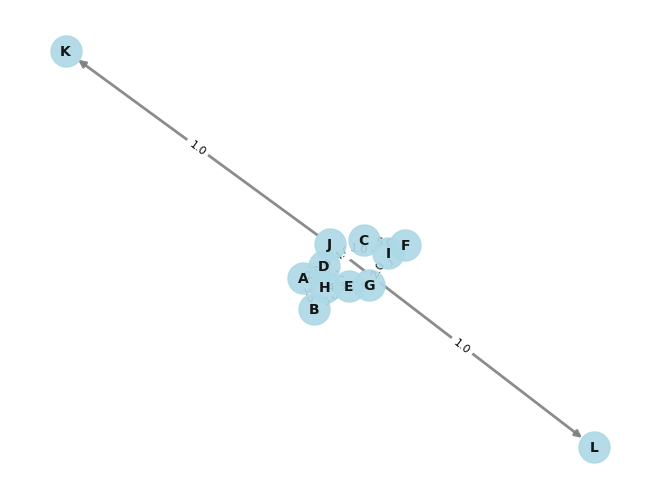

Nodes of the above graph are:-
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
Total no of Nodes are:- 12
Edges of the above graph are:-
 [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('C', 'D'), ('C', 'F'), ('D', 'E'), ('E', 'G'), ('E', 'H'), ('F', 'G'), ('G', 'H'), ('G', 'I'), ('H', 'J'), ('I', 'J'), ('J', 'K'), ('J', 'L')]
Total no of Edges are:-
 16
out Degree [('A', 6.5), ('B', 3.0), ('C', 9.0), ('D', 6.0), ('E', 8.0), ('F', 2.0), ('G', 5.0), ('H', 2.0), ('I', 1.0), ('J', 2.0), ('K', 0), ('L', 0)]
in Degree [('A', 0), ('B', 3.5), ('C', 1.0), ('D', 6.0), ('E', 9.0), ('F', 5.0), ('G', 6.0), ('H', 7.0), ('I', 2.0), ('J', 3.0), ('K', 1.0), ('L', 1.0)]
max out degree node: {'C'}
min out degree node: {'L', 'K'}
max in degree node: {'E'}
min in degree node: {'A'}


In [29]:
directed_graph(df)

In [30]:
def adjecency_matrix_undirected(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    adjacency_matrix_undirected_graph=nx.adjacency_matrix(G)
    matrix=pd.DataFrame(adjacency_matrix_undirected_graph.todense()).T
    print(matrix)
    node = int(input("Enter Node:- "))
    sum1 = 0
    for i in range(len(list(G.nodes()))):
        sum1 = sum1 +  float(matrix[node][i])
 
    print("Sum for Node {} is {}".format(node,sum1))

In [31]:
adjecency_matrix_undirected(df)

C:\Users\rajat\AppData\Local\Temp\ipykernel_23744\2877546678.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix_undirected_graph=nx.adjacency_matrix(G)


     0    1    2    3    4    5    6    7    8    9    10   11
0   0.0  3.5  1.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1   3.5  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   1.0  0.0  0.0  4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0
3   2.0  0.0  4.0  0.0  6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  3.0  0.0  6.0  0.0  0.0  4.0  4.0  0.0  0.0  0.0  0.0
5   0.0  0.0  5.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0
6   0.0  0.0  0.0  0.0  4.0  2.0  0.0  3.0  2.0  0.0  0.0  0.0
7   0.0  0.0  0.0  0.0  4.0  0.0  3.0  0.0  0.0  2.0  0.0  0.0
8   0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  1.0  0.0  0.0
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  1.0  0.0  1.0  1.0
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
Enter Node:- 4
Sum for Node 4 is 17.0


In [32]:
def adjecency_matrix_directed(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    H=nx.DiGraph()
    H.add_weighted_edges_from(edges)
    adjacency_matrix_undirected_graph=nx.adjacency_matrix(H)
    matrix=pd.DataFrame(adjacency_matrix_undirected_graph.todense()).T
    print(matrix)
    node = int(input("Enter Node:- "))
    sum1 = 0
    for i in range(len(list(H.nodes()))):
        sum1 = sum1 +  float(matrix[node][i])
    for i in range(len(list(H.nodes()))):
        sum1 = sum1 +  float(matrix[i][node])
    print("Sum for Node {} is {}".format(node,sum1))

In [33]:
adjecency_matrix_directed(df)

C:\Users\rajat\AppData\Local\Temp\ipykernel_23744\2107974824.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix_undirected_graph=nx.adjacency_matrix(H)


     0    1    2    3    4    5    6    7    8    9    10   11
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1   3.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   2.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  3.0  0.0  6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6   0.0  0.0  0.0  0.0  4.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0
7   0.0  0.0  0.0  0.0  4.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0
8   0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  1.0  0.0  0.0  0.0
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
Enter Node:- 4
Sum for Node 4 is 17.0


In [34]:
def centrality_matrix_undirected(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    G=nx.Graph()
    G.add_weighted_edges_from(edges)
    deg_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweeness_centrality = nx.closeness_centrality(G)
    eigen_vector_centrality = nx.eigenvector_centrality(G)
    udf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
    udf = udf.assign(Closeness_Centrality= closeness_centrality.values())
    udf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
    udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
    print(udf)

In [35]:
centrality_matrix_undirected(df)

   Degree_Centrality  Closeness_Centrality  Betweeness_Centrality  \
A           0.272727              0.354839               0.354839   
B           0.181818              0.407407               0.407407   
C           0.272727              0.379310               0.379310   
D           0.272727              0.440000               0.440000   
E           0.363636              0.550000               0.550000   
F           0.181818              0.423077               0.423077   
G           0.363636              0.523810               0.523810   
H           0.272727              0.523810               0.523810   
I           0.181818              0.440000               0.440000   
J           0.363636              0.440000               0.440000   
K           0.090909              0.314286               0.314286   
L           0.090909              0.314286               0.314286   

   Eigen_Vector_Centrality  
A                 0.279526  
B                 0.239401  
C              

In [36]:
def centrality_matrix_directed(data):
    edges=[]
    for i in range(len(df)):
        edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
    H = nx.DiGraph()
    H.add_weighted_edges_from(edges)
    deg_centrality = nx.degree_centrality(H)
    closeness_centrality = nx.closeness_centrality(H)
    betweeness_centrality = nx.closeness_centrality(H)
    #eigen_vector_centrality = nx.eigenvector_centrality(H)
    udf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
    udf = udf.assign(Closeness_Centrality= closeness_centrality.values())
    udf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
    #udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
    print(udf)

In [37]:
centrality_matrix_directed(df)

   Degree_Centrality  Closeness_Centrality  Betweeness_Centrality
A           0.272727              0.000000               0.000000
B           0.181818              0.090909               0.090909
C           0.272727              0.090909               0.090909
D           0.272727              0.181818               0.181818
E           0.363636              0.242424               0.242424
F           0.181818              0.121212               0.121212
G           0.363636              0.297521               0.297521
H           0.272727              0.318182               0.318182
I           0.181818              0.247475               0.247475
J           0.363636              0.320158               0.320158
K           0.090909              0.275482               0.275482
L           0.090909              0.275482               0.275482


In [38]:
edges=[]
for i in range(len(df)):
    edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
G = nx.Graph()
G.add_weighted_edges_from(edges)
deg_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweeness_centrality = nx.closeness_centrality(G)
eigen_vector_centrality = nx.eigenvector_centrality(G)
udf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
udf = udf.assign(Closeness_Centrality= closeness_centrality.values())
udf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
udf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality,Eigen_Vector_Centrality
A,0.272727,0.354839,0.354839,0.279526
B,0.181818,0.407407,0.407407,0.239401
C,0.272727,0.379310,0.379310,0.276795
D,0.272727,0.440000,0.440000,0.330754
E,0.363636,0.550000,0.550000,0.445844
F,0.181818,0.423077,0.423077,0.228393
G,0.363636,0.523810,0.523810,0.415222
H,0.272727,0.523810,0.523810,0.365500
I,0.181818,0.440000,0.440000,0.218353
J,0.363636,0.440000,0.440000,0.246370


In [39]:
def find_node_min_centarlity(udf,cent_name):
    min = 100
    node_min = -1
    for i in range(len(udf)):
        if udf[cent_name][i] < min:
            min =  udf[cent_name][i]
            node_min = i
        return node_min,min

def find_node_max_centarlity(udf,cent_name):
    max = 0
    node_max = -1
    for i in range(len(udf)):
        if udf[cent_name][i] > max:
            max =  udf[cent_name][i]
            node_max = i
        return node_max,max

In [40]:
node_min,min = find_node_min_centarlity(udf,'Degree_Centrality')
node_max,max = find_node_max_centarlity(udf,'Degree_Centrality')
print(node_min,min)
print(node_max,max)
degree_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.2727272727272727
0 0.2727272727272727


In [41]:
node_min,min = find_node_min_centarlity(udf,'Closeness_Centrality')
node_max,max = find_node_max_centarlity(udf,'Closeness_Centrality')
print(node_min,min)
print(node_max,max)
closeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.3548387096774194
0 0.3548387096774194


In [42]:
node_min,min = find_node_min_centarlity(udf,'Betweeness_Centrality')
node_max,max = find_node_max_centarlity(udf,'Betweeness_Centrality')
print(node_min,min)
print(node_max,max)
betweeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.3548387096774194
0 0.3548387096774194


In [43]:
node_min,min = find_node_min_centarlity(udf,'Eigen_Vector_Centrality')
node_max,max = find_node_max_centarlity(udf,'Eigen_Vector_Centrality')
print(node_min,min)
print(node_max,max)
eigen_vector_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.279526225514069
0 0.279526225514069


In [44]:
udf_min_max = pd.DataFrame(columns=['Min Degree Node','Value C1','Max Degree Node','Value C2'])

udf_min_max

,Min Degree Node,Value C1,Max Degree Node,Value C2


In [45]:
udf_min_max = udf_min_max.append(pd.Series(degree_cent_min_max,index = udf_min_max.columns,name = 'Degree Centrality'))
udf_min_max = udf_min_max.append(pd.Series(closeness_cent_min_max,index = udf_min_max.columns,name = 'Closeness Centrality'))
udf_min_max = udf_min_max.append(pd.Series(betweeness_cent_min_max,index = udf_min_max.columns,name = 'Betweeness Centrality'))
udf_min_max = udf_min_max.append(pd.Series(eigen_vector_cent_min_max,index = udf_min_max.columns,name = 'Eigen Vector Centrality'))
udf_min_max

C:\Users\rajat\AppData\Local\Temp\ipykernel_23744\4159790018.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(degree_cent_min_max,index = udf_min_max.columns,name = 'Degree Centrality'))
C:\Users\rajat\AppData\Local\Temp\ipykernel_23744\4159790018.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(closeness_cent_min_max,index = udf_min_max.columns,name = 'Closeness Centrality'))
C:\Users\rajat\AppData\Local\Temp\ipykernel_23744\4159790018.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(betweeness_cent_min_max,index = udf_min_max.columns,name = 'Betweeness Centrality'))
C:\Users\rajat\AppDa

,Min Degree Node,Value C1,Max Degree Node,Value C2
Degree Centrality,0,0.272727,0,0.272727
Closeness Centrality,0,0.354839,0,0.354839
Betweeness Centrality,0,0.354839,0,0.354839
Eigen Vector Centrality,0,0.279526,0,0.279526


In [46]:
edges=[]
for i in range(len(df)):
    edges.append((df.loc[i, 'Source'], df.loc[i, 'Destination'], df.loc[i, 'Weight']))
H = nx.DiGraph()
H.add_weighted_edges_from(edges)
deg_centrality = nx.degree_centrality(H)
closeness_centrality = nx.closeness_centrality(H)
betweeness_centrality = nx.closeness_centrality(H)
#eigen_vector_centrality = nx.eigenvector_centrality(H)
ddf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
ddf = udf.assign(Closeness_Centrality= closeness_centrality.values())
ddf = udf.assign(Betweeness_Centrality= betweeness_centrality.values())
#udf = udf.assign(Eigen_Vector_Centrality= eigen_vector_centrality.values())
ddf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality,Eigen_Vector_Centrality
A,0.272727,0.354839,0.000000,0.279526
B,0.181818,0.407407,0.090909,0.239401
C,0.272727,0.379310,0.090909,0.276795
D,0.272727,0.440000,0.181818,0.330754
E,0.363636,0.550000,0.242424,0.445844
F,0.181818,0.423077,0.121212,0.228393
G,0.363636,0.523810,0.297521,0.415222
H,0.272727,0.523810,0.318182,0.365500
I,0.181818,0.440000,0.247475,0.218353
J,0.363636,0.440000,0.320158,0.246370


In [47]:
ddf = pd.DataFrame.from_dict(deg_centrality,orient='index',columns=['Degree_Centrality'])
ddf = ddf.assign(Closeness_Centrality= closeness_centrality.values())
ddf = ddf.assign(Betweeness_Centrality= betweeness_centrality.values())
#ddf = ddf.assign(Eigen_Vector_Centrality= dg_eigen_vector_centrality.values())
ddf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality
A,0.272727,0.000000,0.000000
B,0.181818,0.090909,0.090909
C,0.272727,0.090909,0.090909
D,0.272727,0.181818,0.181818
E,0.363636,0.242424,0.242424
F,0.181818,0.121212,0.121212
G,0.363636,0.297521,0.297521
H,0.272727,0.318182,0.318182
I,0.181818,0.247475,0.247475
J,0.363636,0.320158,0.320158


In [48]:
node_min,min = find_node_min_centarlity(udf,'Degree_Centrality')
node_max,max = find_node_max_centarlity(udf,'Degree_Centrality')
print(node_min,min)
print(node_max,max)
degree_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.2727272727272727
0 0.2727272727272727


In [49]:
node_min,min = find_node_min_centarlity(ddf,'Closeness_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Closeness_Centrality')
print(node_min,min)
print(node_max,max)
closeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.0
-1 0


In [50]:
node_min,min = find_node_min_centarlity(ddf,'Betweeness_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Betweeness_Centrality')
print(node_min,min)
print(node_max,max)
betweeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}

0 0.0
-1 0


In [51]:
ddf_min_max = pd.DataFrame(columns=['Min Degree Node','Value C1','Max Degree Node','Value C2'])

ddf_min_max

,Min Degree Node,Value C1,Max Degree Node,Value C2


In [52]:
ddf_min_max = ddf_min_max.append(pd.Series(degree_cent_min_max,index = ddf_min_max.columns,name = 'Degree Centrality'))
ddf_min_max = ddf_min_max.append(pd.Series(closeness_cent_min_max,index = ddf_min_max.columns,name = 'Closeness Centrality'))
ddf_min_max = ddf_min_max.append(pd.Series(betweeness_cent_min_max,index = ddf_min_max.columns,name = 'Betweeness Centrality'))
#ddf_min_max = ddf_min_max.append(pd.Series(eigen_vector_cent_min_max,index = ddf_min_max.columns,name = 'Eigen Vector Centrality'))
ddf_min_max

C:\Users\rajat\AppData\Local\Temp\ipykernel_23744\2392606401.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(degree_cent_min_max,index = ddf_min_max.columns,name = 'Degree Centrality'))
C:\Users\rajat\AppData\Local\Temp\ipykernel_23744\2392606401.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(closeness_cent_min_max,index = ddf_min_max.columns,name = 'Closeness Centrality'))
C:\Users\rajat\AppData\Local\Temp\ipykernel_23744\2392606401.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(betweeness_cent_min_max,index = ddf_min_max.columns,name = 'Betweeness Centrality'))


,Min Degree Node,Value C1,Max Degree Node,Value C2
Degree Centrality,0,0.272727,0,0.272727
Closeness Centrality,0,0.000000,-1,0.000000
Betweeness Centrality,0,0.000000,-1,0.000000
